                                Mall Customer Segmentation Data
                                     Market Basket Analysis

**Context:**
This dataset is designed for learning customer segmentation concepts, commonly known as market basket analysis. It serves as a resource for applying unsupervised machine learning techniques, particularly K-Means clustering.

**Content:**
The dataset contains customer details from a supermarket mall, collected through membership cards. It includes:

Customer ID

Age

Gender

Annual Income

Spending Score (a metric based on customer behavior and purchasing patterns)

**Problem Statement:**
As a mall owner, the goal is to understand customer segments to identify potential target customers. Insights from clustering can help the marketing team strategize personalized promotions and improve customer engagement.

# Important Libary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import KMeans

# Load Data

In [2]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# Overview of dataset 

In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
df.sample(5) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
31,32,Female,21,30,73
196,197,Female,45,126,28
148,149,Female,34,78,22
180,181,Female,37,97,32
147,148,Female,32,77,74


In [10]:
df.nunique() 

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [11]:
df.isnull().sum() 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


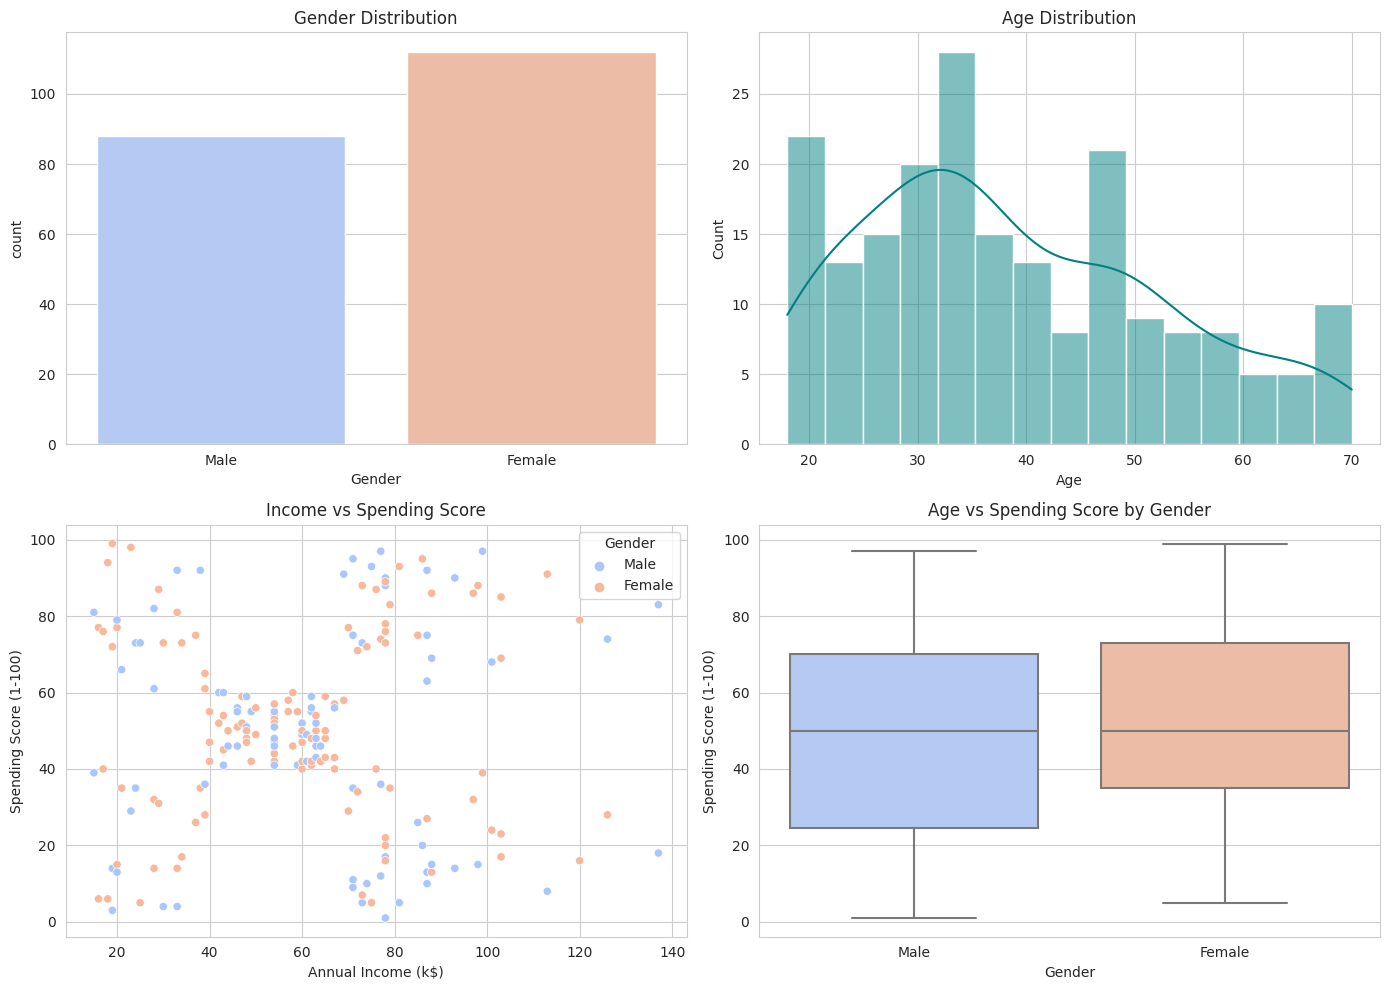

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

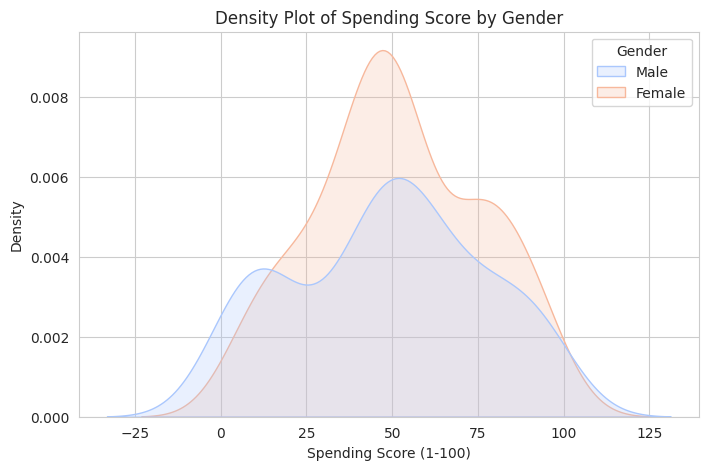

In [13]:

df["Spending Score (1-100)"] = pd.to_numeric(df["Spending Score (1-100)"], errors='coerce')

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Gender Distribution (Bar Plot)
sns.countplot(x='Gender', data=df, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title("Gender Distribution")

# 2. Age Distribution (Histogram)
sns.histplot(df['Age'], bins=15, kde=True, ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Age Distribution")

# 3. Income vs Spending Score (Scatter Plot)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title("Income vs Spending Score")

# 4. Age vs Spending Score (Box Plot)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("Age vs Spending Score by Gender")

plt.tight_layout()
plt.show()

# 5. Density Plot of Spending Score by Gender
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="Spending Score (1-100)", hue="Gender", fill=True, palette="coolwarm")
plt.title("Density Plot of Spending Score by Gender")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.show()




# Data Preprocessing


In [14]:
# Drop 'CustomerID' as it's not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

In [15]:
# Encode categorical column (Gender)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0

In [ ]:
# Display processed data
print("\nProcessed Data:")
print(df.head())

In [16]:
# Standardizing the dataset (Scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Creating Model - 1

In [18]:
wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS (Sum of squared distances to the closest centroid)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

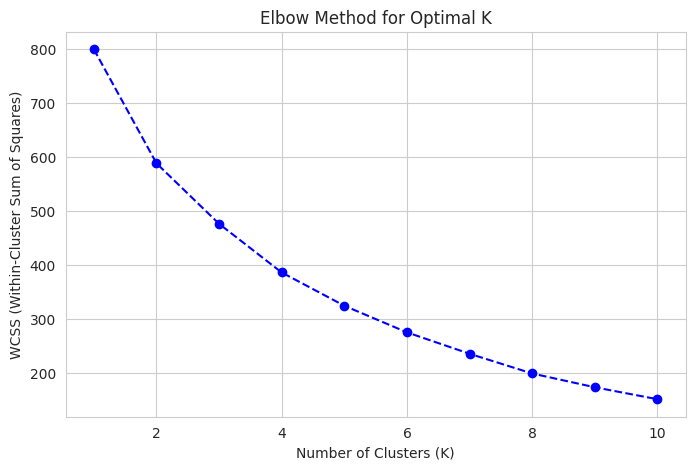

In [19]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [20]:
optimal_k = 5  # Choose based on elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)  # Assign clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


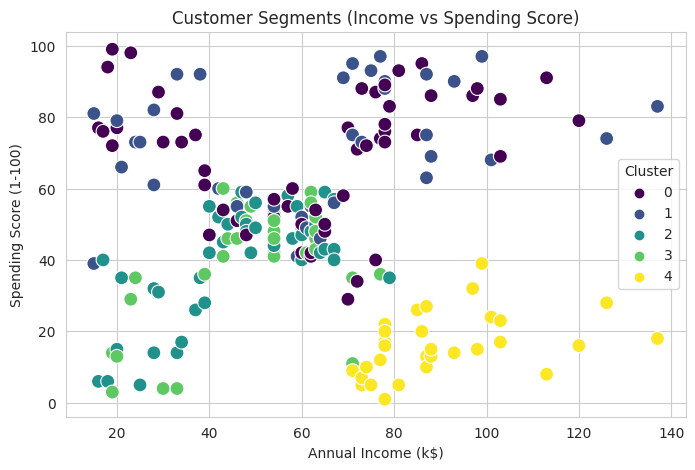

In [21]:
# Scatter plot for Income vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="viridis", s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (Income vs Spending Score)")
plt.legend(title="Cluster")
plt.show()

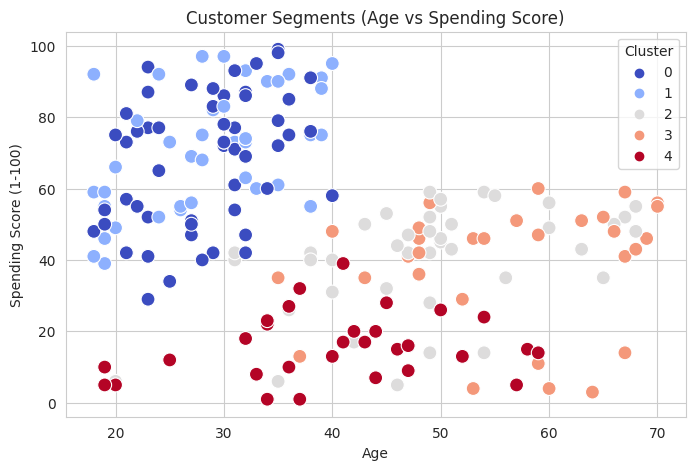

In [22]:
# Scatter plot for Age vs Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=df["Cluster"], palette="coolwarm", s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (Age vs Spending Score)")
plt.legend(title="Cluster")
plt.show()

# Create Model - 2 


In [24]:
# Average characteristics per cluster
cluster_summary = df.groupby("Cluster").mean()
print("\nCluster Characteristics:\n", cluster_summary)

inertias = []
for i in range(1, 11):  # From 1 to 10 clusters
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertias.append(km.inertia_)


Cluster Characteristics:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.000000  28.345455           60.800000               68.654545
1        1.000000  28.250000           62.000000               71.675000
2        0.000000  48.720930           46.186047               39.674419
3        1.000000  55.903226           48.774194               38.806452
4        0.548387  40.419355           90.000000               15.741935


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [25]:
inertias

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.072849014323]

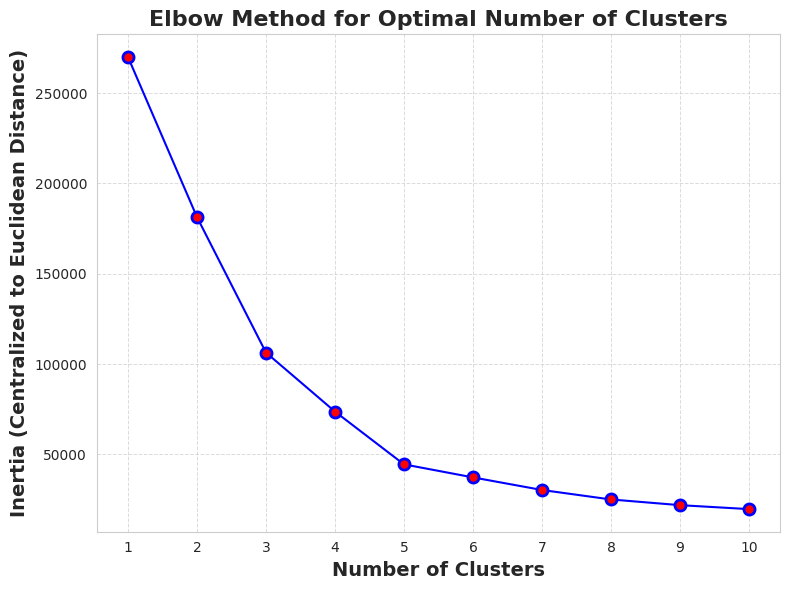

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='red', markeredgewidth=2)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Inertia (Centralized to Euclidean Distance)', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()


In [27]:
km = KMeans(n_clusters=5, random_state=42)
predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
df['Cluster'] = predicted

In [29]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

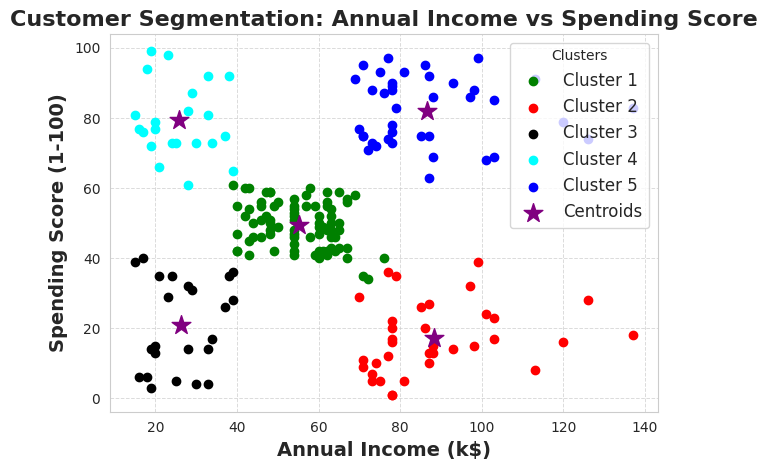

In [30]:

cluster_colors = ['green', 'red', 'black', 'cyan', 'blue']
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color=cluster_colors[i], label=f'Cluster {i+1}')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroids')


plt.title('Customer Segmentation: Annual Income vs Spending Score', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')
plt.legend(title='Clusters', fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Cluster': 'count'
}).reset_index()


print(cluster_summary)

  Cluster Annual Income (k$)            Spending Score (1-100)             \
                        mean        std                   mean        std   
0       0          55.296296   8.988109              49.518519   6.530909   
1       1          88.200000  16.399067              17.114286   9.952154   
2       2          26.304348   7.893811              20.913043  13.017167   
3       3          25.727273   7.566731              79.363636  10.504174   
4       4          86.538462  16.312485              82.128205   9.364489   

  Cluster  
    count  
0      81  
1      35  
2      23  
3      22  
4      39  
